# FLO-Unsupervised-Learning-Customer-Segmentation

# History

Founded by Ahmet Ziylan in a small workshop in 1960, FLO Mağazacılık is now the undisputed leader in the Turkish footwear market. Directly employing over 10,000 people and indirectly providing jobs to nearly 30,000, FLO Mağazacılık sells more than 55 million pairs of shoes annually.

Reaching almost every point in Turkey with its stores, FLO meets consumers with nearly 500 stores domestically and over 100 stores in 21 different countries abroad. Continuously expanding its boundaries, FLO Mağazacılık serves with over 600 stores both domestically and internationally.

The multi-brand sneaker and sportswear store concept, In Street, under the umbrella of FLO Mağazacılık, was established in 2014. In Street strengthens FLO's sales network every year and contributes to its accessibility with over 130 stores and the website www.instreet.com.tr.

FLO Mağazacılık acquired Lumberjack, one of the fastest-growing brands in Italy, in 2012 and purchased the Turkey licensing rights of Nine West in 2019. FLO Mağazacılık continues its steady growth with these acquisitions.

In addition to its retail brands, FLO Mağazacılık also includes leading shoe brands in their respective fields such as Kinetix, Dockers by Gerli, Polaris, Butigo, and Mercedes, which are sold in its stores and wholesale.

### 1 ) Business Problem

FLO, an online shoe store, wants to segment its customers and define marketing strategies based on these segments. To achieve this, customer behaviors will be analyzed and groups will be formed based on the clusters in these behaviors.

**Task:** Customers are to be segmented and their behaviors observed using Unsupervised Learning methods such as K-means and Hierarchical Clustering.
    
### Dataset Story

#### The dataset consists of information obtained from the past shopping behaviors of customers who made their last purchases in 2020-2021 as OmniChannel (shopping both online and offline).

- **master_id**: Unique customer ID
- **order_channel**: The channel used for shopping (Android, iOS, Desktop, Mobile, Offline)
- **last_order_channel**: The channel of the last purchase
- **first_order_date**: The date of the customer's first purchase
- **last_order_date**: The date of the customer's last purchase
- **last_order_date_online**: The date of the customer's last purchase on the online platform
- **last_order_date_offline**: The date of the customer's last purchase on the offline platform
- **order_num_total_ever_online**: The total number of purchases the customer made on the online platform
- **order_num_total_ever_offline**: The total number of purchases the customer made offline
- **customer_value_total_ever_offline**: The total amount the customer paid in offline purchases
- **customer_value_total_ever_online**: The total amount the customer paid in online purchases
- **interested_in_categories_12**: The list of categories the customer has shopped in the last 12 months

### 2. Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from pandas.errors import SettingWithCopyWarning

warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

from sklearn.exceptions import ConvergenceWarning
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

from scipy import stats
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
## Load the dataset

df = pd.read_csv("flo_data_20k.csv")
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,49.99,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,315.94,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,113.64,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.0,2.0,120.48,934.21,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]"


In [3]:
# # Display information about the dataset using  function

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe().T)

check_df(df)

##################### Shape #####################
(19945, 12)
##################### Types #####################
master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object
##################### Head #####################
                              master_id order_channel last_order_channel  \
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline   
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile   
2  69b69676-1a40-11ea-941b-000d3a38a36f   Android App    

In [4]:
### Converting variables representing dates to the type 'date'

date_cols = [col for col in df.columns if 'date' in col]
df[date_cols] = df[date_cols].apply(pd.to_datetime)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [5]:
## Creating new variables for each customer's total number of purchases and total value. 

df['num_of_total_order'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']
df['total_of_customer_value'] = df['customer_value_total_ever_online'] + df[
    'customer_value_total_ever_offline']

In [6]:
## Recency = Today's Date - Last Purchase Date
## Frequency = Total number of transactions
## Monetary = Total amount spent by the customer

# Set the analysis date

df["last_order_date"].max()

Timestamp('2021-05-30 00:00:00')

In [7]:
# The analysis date is defined as two days after the last date in the dataset.

analysis_date = dt.datetime(2021, 6, 1)

type(analysis_date)

datetime.datetime

In [8]:
# Recency

df["recency"] = (analysis_date - df["last_order_date"]).astype('timedelta64[ns]').dt.days

# Tenure

df["tenure"] = (df["last_order_date"] - df["first_order_date"]).dt.days

#Frequency
df["frequency"] = df["num_of_total_order"]

#Monetary
df["monetary"] = df["total_of_customer_value"]

**CAPTURING NUMERICAL AND CATEGORICAL VARIABLES**

In [9]:
## The grab_col_names function is designed to identify and categorize the columns in a given DataFrame into three distinct types: 
## categorical, numerical, and cardinal categorical variables. 

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Returns the names of categorical, numerical, and cardinal categorical variables in the dataset.
    Note: Numerical-looking categorical variables are also included in the categorical variables.

    Parameters
    ------
        dataframe: dataframe
            The dataframe from which to get the variable names
        cat_th: int, optional
            Class threshold for numerical but categorical variables
        car_th: int, optional
            Class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
            List of categorical variables
        num_cols: list
            List of numerical variables
        cat_but_car: list
            List of cardinal categorical variables

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is included in cat_cols.
        The sum of the returned 3 lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables
    """

    # Identifying categorical variables (variables of type 'object')
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    # Identifying numerical but categorical variables (with unique values less than cat_th and not of type 'object')
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    
    # Identifying cardinal categorical variables (with unique values greater than car_th and of type 'object')
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    
    # Adding numerical but categorical variables to the list of categorical variables
    cat_cols = cat_cols + num_but_cat
    
    # Removing cardinal categorical variables from the list of categorical variables
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Identifying numerical variables (variables not of type 'object')
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    
    # Removing numerical but categorical variables from the list of numerical variables
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Printing summary information about the dataset
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    # Returning the lists of categorical, numerical, and cardinal categorical variables
    return cat_cols, num_cols, cat_but_car

In [10]:
# Execute the function to identify and separate variable types.

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 19945
Variables: 18
cat_cols: 2
num_cols: 14
cat_but_car: 2
num_but_cat: 0


In [11]:
num_cols

['first_order_date',
 'last_order_date',
 'last_order_date_online',
 'last_order_date_offline',
 'order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online',
 'num_of_total_order',
 'total_of_customer_value',
 'recency',
 'tenure',
 'frequency',
 'monetary']

#### 3) MODELS

In [12]:
## Creating model of dataframe

model_df = df[["order_num_total_ever_online","order_num_total_ever_offline","customer_value_total_ever_offline","customer_value_total_ever_online","recency","tenure","frequency","monetary"]]

model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure,frequency,monetary
0,4.0,1.0,139.99,799.38,95,119,5.0,939.37
1,19.0,2.0,159.97,1853.58,105,1469,21.0,2013.55
2,3.0,2.0,189.97,395.35,186,366,5.0,585.32
3,1.0,1.0,39.99,81.98,135,11,2.0,121.97
4,1.0,1.0,49.99,159.99,86,582,2.0,209.98


#### 3.1) Customer Segmentation with K-Means

**SKEWNESS**

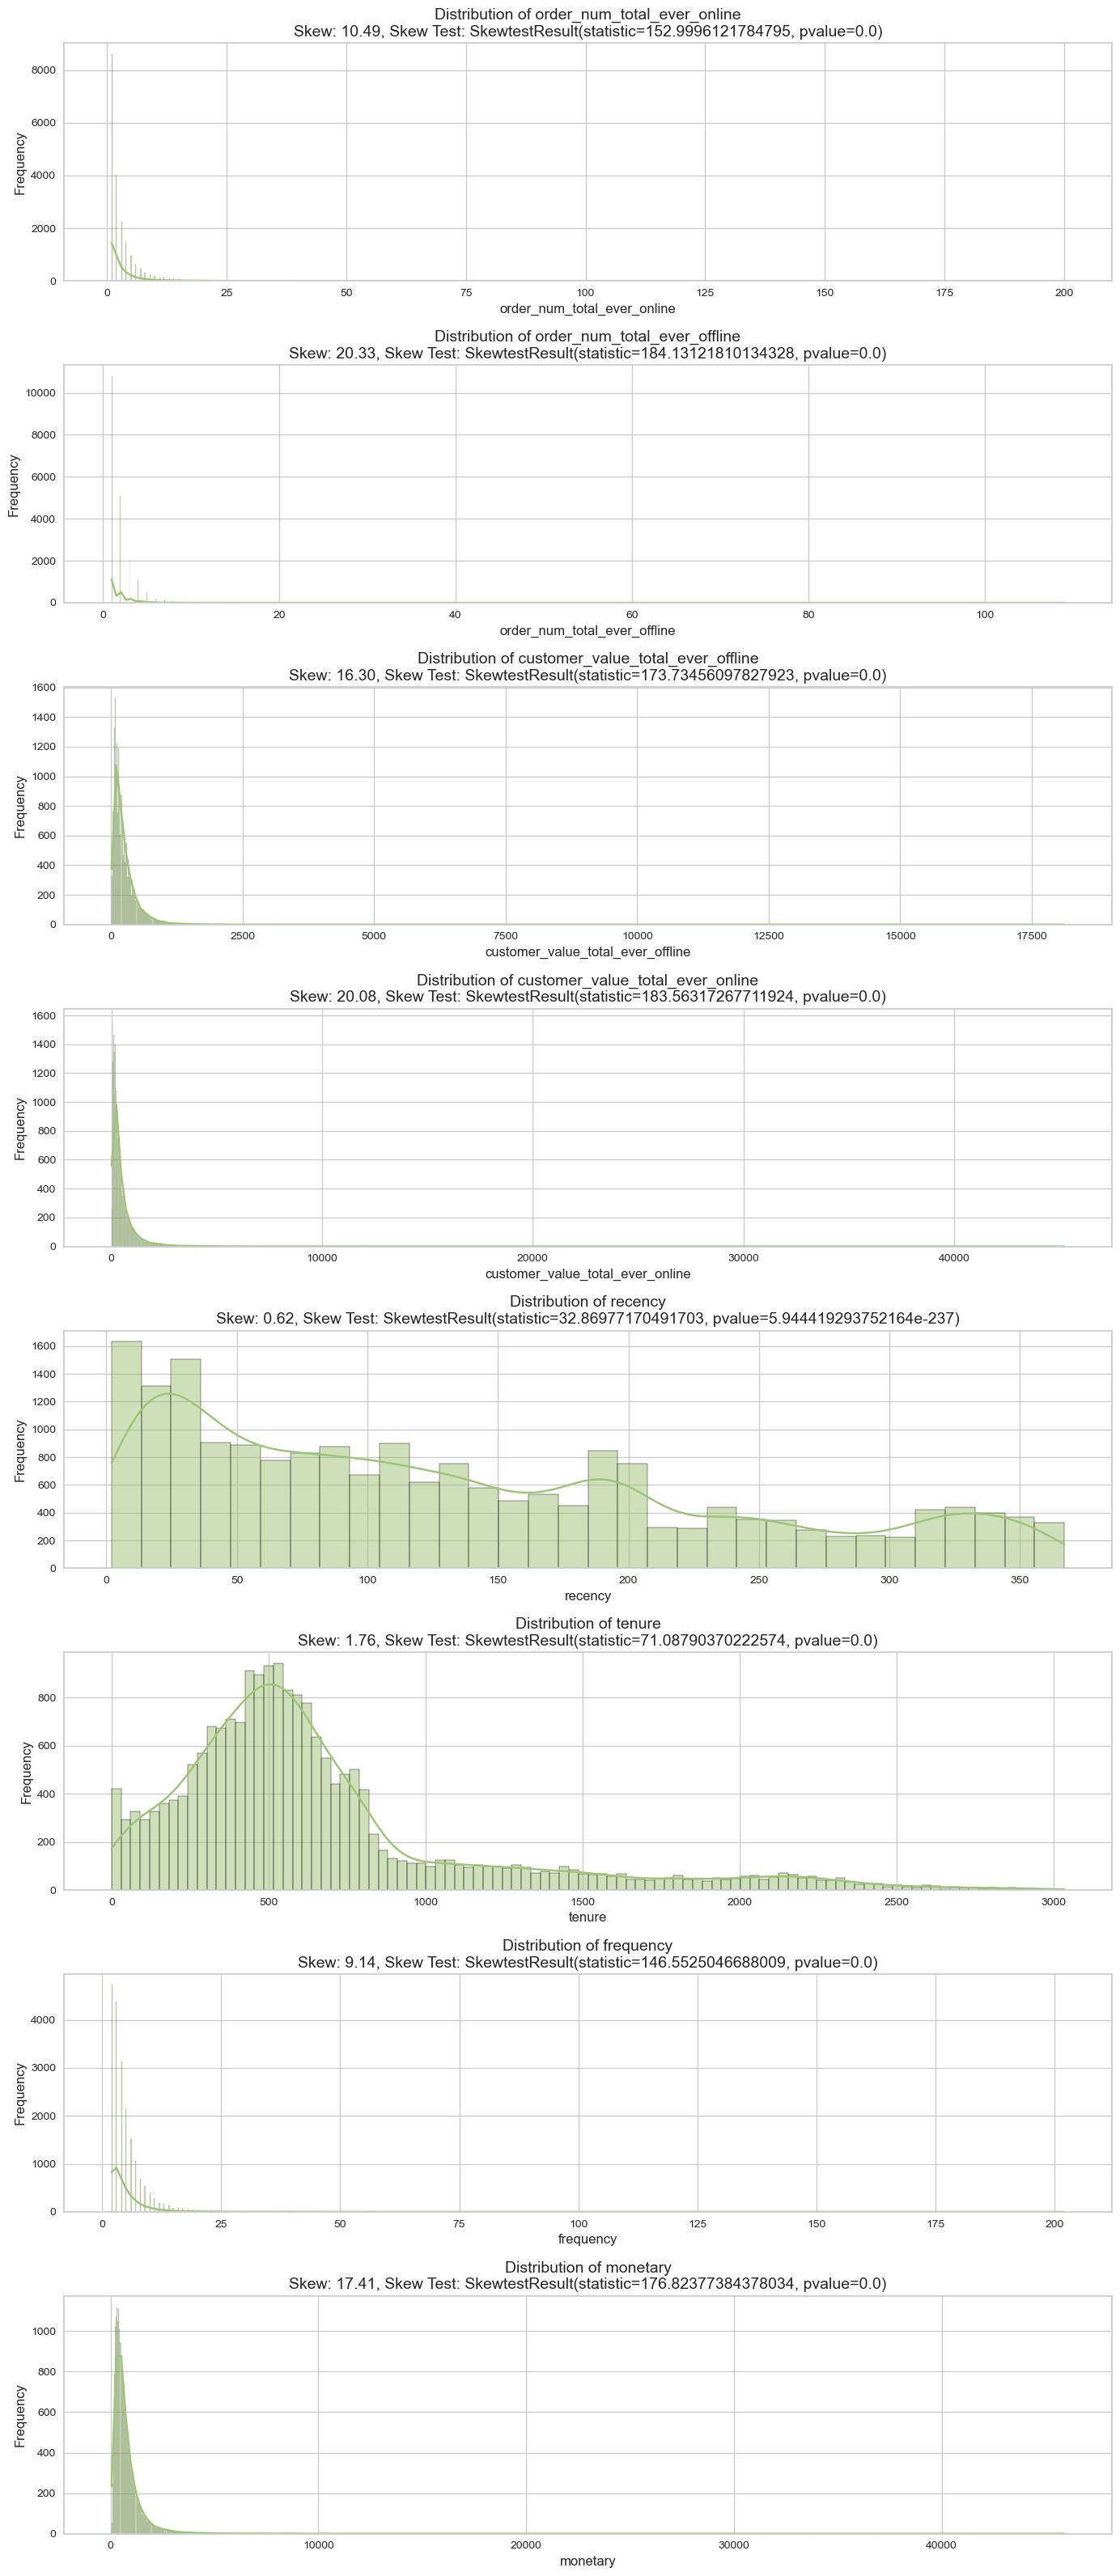

In [13]:

def check_skew(df, columns):
    num_columns = len(columns)
    plt.figure(figsize=(14, num_columns * 4))  
    
    for i, column in enumerate(columns):
        skew = stats.skew(df[column])
        skewtest = stats.skewtest(df[column])
        plt.subplot(num_columns, 1, i + 1)
        sns.histplot(df[column], kde=True, color='g')
        plt.title(f'Distribution of {column}\nSkew: {skew:.2f}, Skew Test: {skewtest}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('before_transform.png', format='png', dpi=1000)  
    plt.show()


columns_to_check = model_df.select_dtypes(include=[np.number]).columns.tolist()


check_skew(model_df, columns_to_check)

**Applying log transformation to achieve normal distribution**

In [14]:
def apply_log_transformation(dataframe):

    numeric_columns = dataframe.select_dtypes(include=[np.number]).columns.tolist()
    
    for column in numeric_columns:
        dataframe[column] = np.log1p(dataframe[column])
    return dataframe



In [15]:
apply_log_transformation(model_df)

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure,frequency,monetary
0,1.609438,0.693147,4.948689,6.685087,4.564348,4.787492,1.791759,6.846273
1,2.995732,1.098612,5.081218,7.525414,4.663439,7.293018,3.091042,7.608151
2,1.386294,1.098612,5.252116,5.982298,5.231109,5.905362,1.791759,6.373866
3,0.693147,0.693147,3.713328,4.418600,4.912655,2.484907,1.098612,4.811940
4,0.693147,0.693147,3.931630,5.081342,4.465908,6.368187,1.098612,5.351763
...,...,...,...,...,...,...,...,...
19940,0.693147,1.098612,5.673255,4.727211,5.805135,5.666427,1.386294,5.998837
19941,0.693147,0.693147,5.020454,5.484755,5.087596,5.693732,1.098612,5.969909
19942,1.098612,0.693147,4.948618,6.202455,2.197225,6.432940,1.386294,6.451954
19943,0.693147,1.791759,6.569187,5.700377,4.691348,6.536692,1.945910,6.918468


**SCALING**

In [16]:
## Standartlastirma islemleri

sc = MinMaxScaler((0, 1))

model_scaling = sc.fit_transform(model_df)

model_scaling[0:5]

array([[0.19875475, 0.        , 0.34438148, 0.50077408, 0.72060652,
        0.59709549, 0.16446358, 0.43701169],
       [0.49945907, 0.10118078, 0.36227417, 0.60476237, 0.74120981,
        0.90958443, 0.47274549, 0.54733048],
       [0.15035216, 0.10118078, 0.38534707, 0.41380577, 0.85924141,
        0.73651614, 0.16446358, 0.36860775],
       [0.        , 0.        , 0.17759598, 0.22030218, 0.79302752,
        0.30991731, 0.        , 0.14244324],
       [0.        , 0.        , 0.20706876, 0.30231487, 0.70013855,
        0.79423966, 0.        , 0.22060881]])

In [17]:
## Convert to dataframe

model_df=pd.DataFrame(model_scaling,columns=model_df.columns)
model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure,frequency,monetary
0,0.198755,0.000000,0.344381,0.500774,0.720607,0.597095,0.164464,0.437012
1,0.499459,0.101181,0.362274,0.604762,0.741210,0.909584,0.472745,0.547330
2,0.150352,0.101181,0.385347,0.413806,0.859241,0.736516,0.164464,0.368608
3,0.000000,0.000000,0.177596,0.220302,0.793028,0.309917,0.000000,0.142443
4,0.000000,0.000000,0.207069,0.302315,0.700139,0.794240,0.000000,0.220609


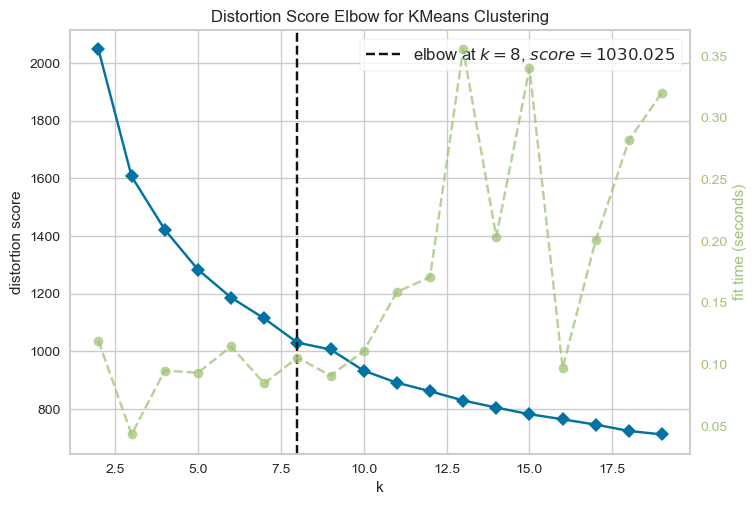

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# Automatically determine the optimal number of clusters using the Elbow Method

kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(model_df)
elbow.show()

In [19]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(model_df)

segments=kmeans.labels_

segments

array([3, 2, 3, ..., 7, 5, 4])

In [20]:
# Creating final_df

final_df =df[["master_id","order_num_total_ever_online","order_num_total_ever_offline","customer_value_total_ever_offline","customer_value_total_ever_online","recency","tenure","frequency","monetary"]]

final_df["segment"] = segments

final_df.head()

,master_id,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure,frequency,monetary,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,4.0,1.0,139.99,799.38,95,119,5.0,939.37,3
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,19.0,2.0,159.97,1853.58,105,1469,21.0,2013.55,2
2,69b69676-1a40-11ea-941b-000d3a38a36f,3.0,2.0,189.97,395.35,186,366,5.0,585.32,3
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.0,1.0,39.99,81.98,135,11,2.0,121.97,4
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,1.0,1.0,49.99,159.99,86,582,2.0,209.98,0


In [21]:
cat_cols, num_cols, cat_but_car = grab_col_names(final_df)

Observations: 19945
Variables: 10
cat_cols: 1
num_cols: 8
cat_but_car: 1
num_but_cat: 1


**Analysis of Categorical Variables**

In [22]:
def cat_summary(dataframe, cat_cols, plot=False):
    """
    Displays value counts and ratios of categorical columns in a dataframe.
    
    Parameters:
    ----------
    dataframe : DataFrame
        The dataframe containing the categorical columns.
    cat_cols : list
        List of categorical column names to analyze.
    plot : bool, optional
        Whether to display count plots for each categorical column. Default is False.

    Returns:
    -------
    None
    """

    for col_name in cat_cols:
        # Print value counts and ratios
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            # Plot countplot if plot=True
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show()

         segment      Ratio
segment                    
4           3496  17.528203
6           3385  16.971672
3           3206  16.074204
0           3071  15.397343
5           2110  10.579093
1           1755   8.799198
7           1566   7.851592
2           1356   6.798696
##########################################


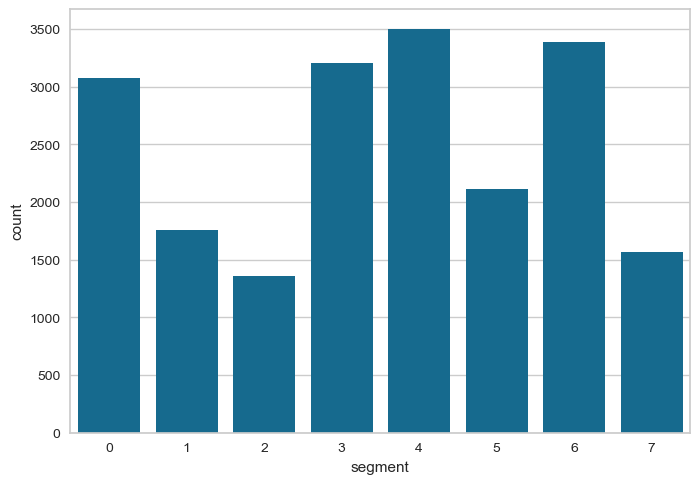

In [23]:
#Summary of Categoricals columns

cat_summary(final_df, cat_cols, True)

**Analysis of Numerical Variables**

count    19945.000000
mean         3.110855
std          4.225647
min          1.000000
5%           1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          2.000000
60%          2.000000
70%          3.000000
80%          4.000000
90%          7.000000
95%         10.000000
99%         20.000000
max        200.000000
Name: order_num_total_ever_online, dtype: float64
count    19945.000000
mean         1.913913
std          2.062880
min          1.000000
5%           1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          1.000000
60%          2.000000
70%          2.000000
80%          3.000000
90%          4.000000
95%          4.000000
99%          7.000000
max        109.000000
Name: order_num_total_ever_offline, dtype: float64
count    19945.000000
mean       253.922597
std        301.532853
min         10.000000
5%          39.990000
10%         59.990000
20%         89.9800

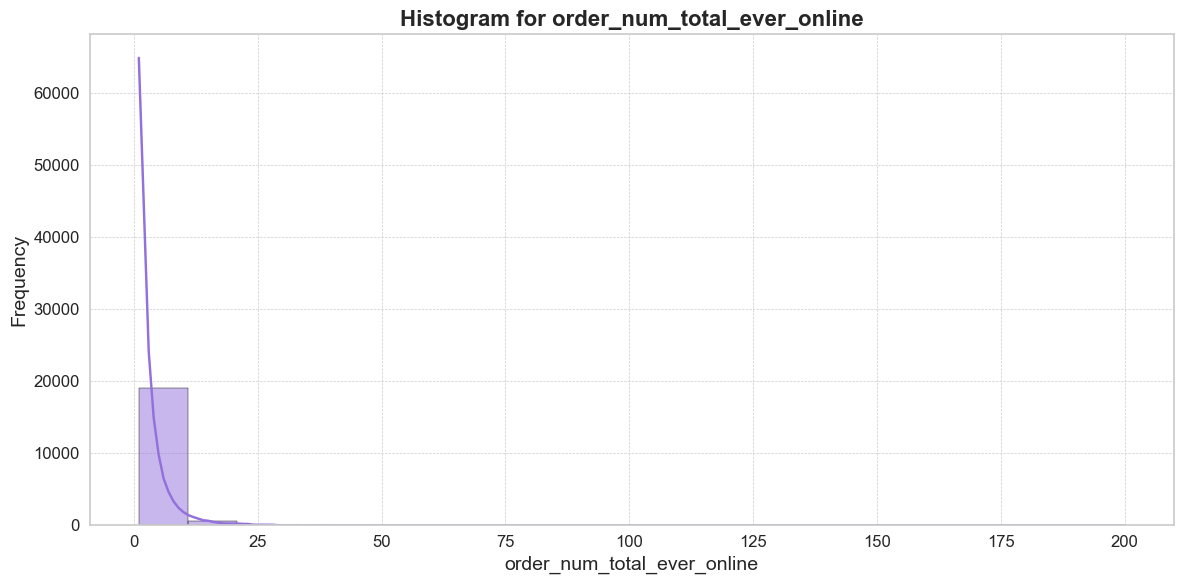

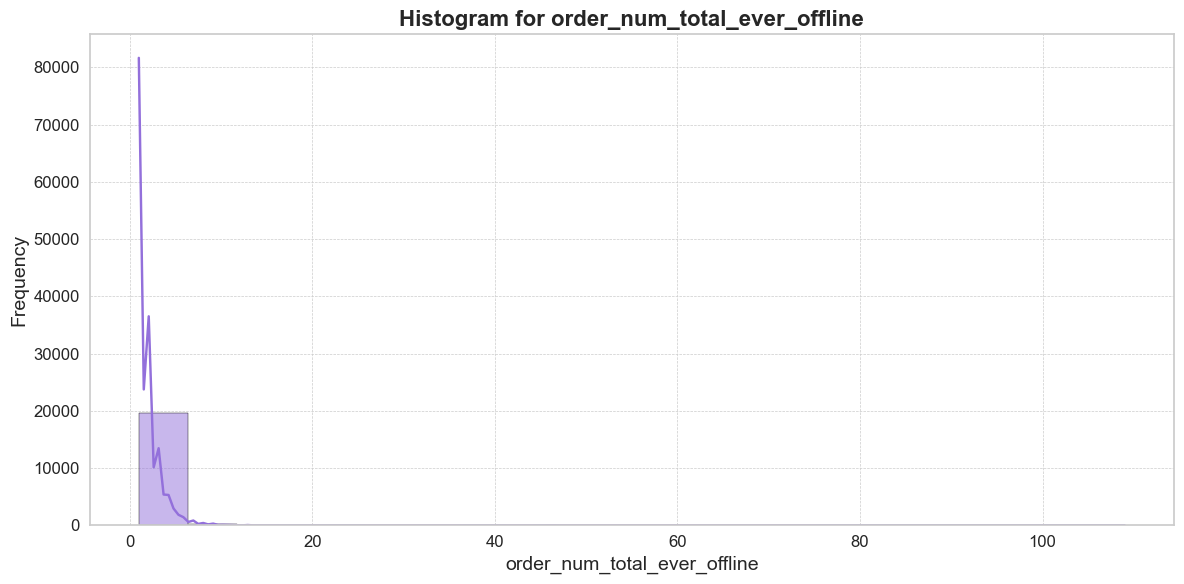

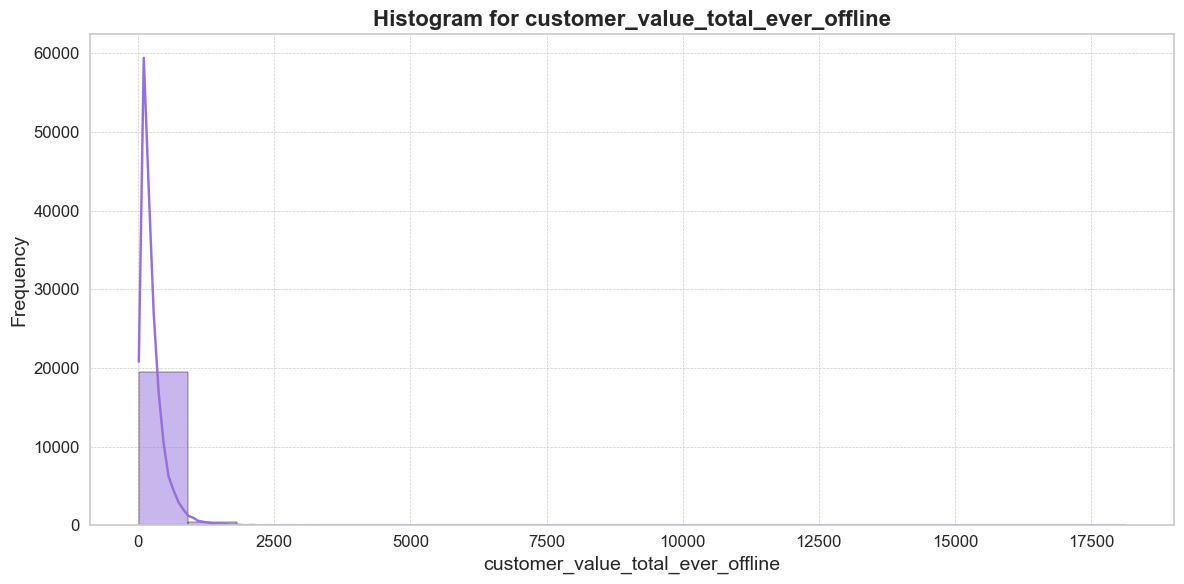

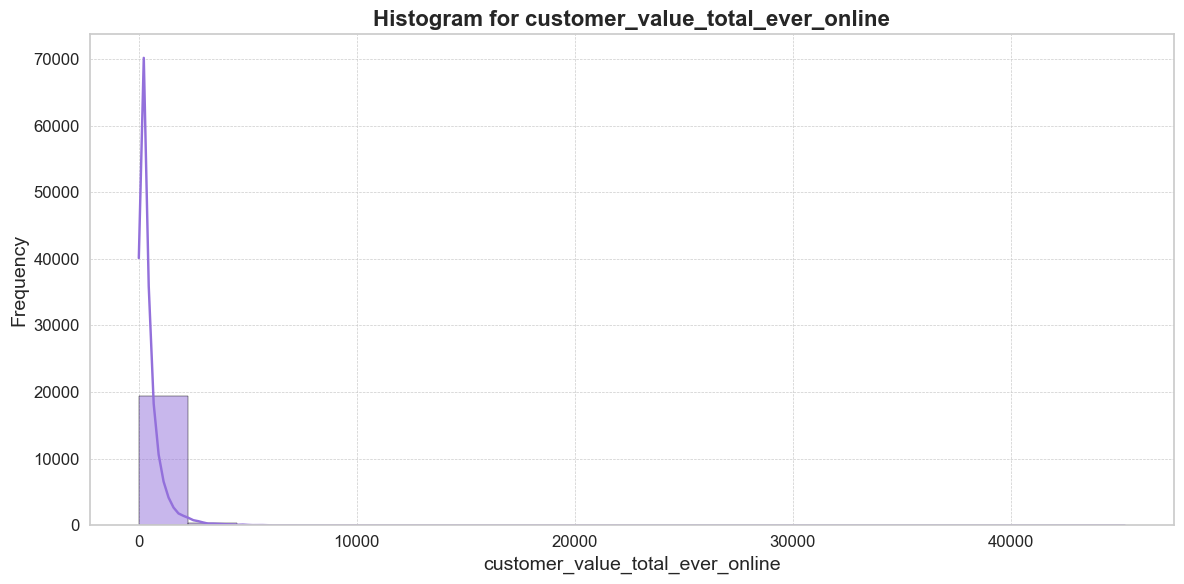

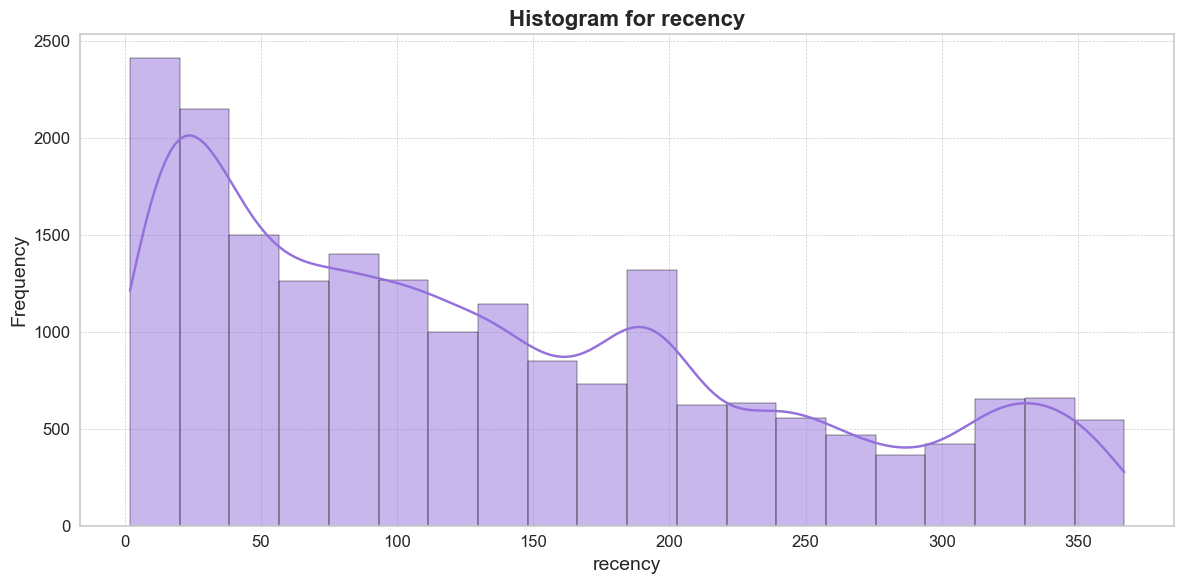

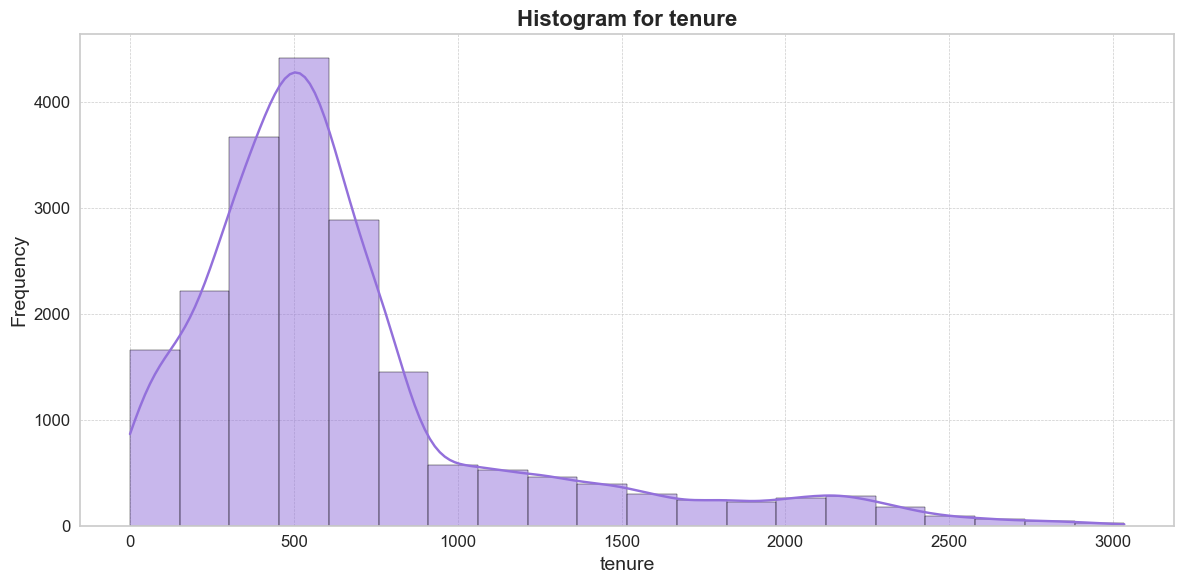

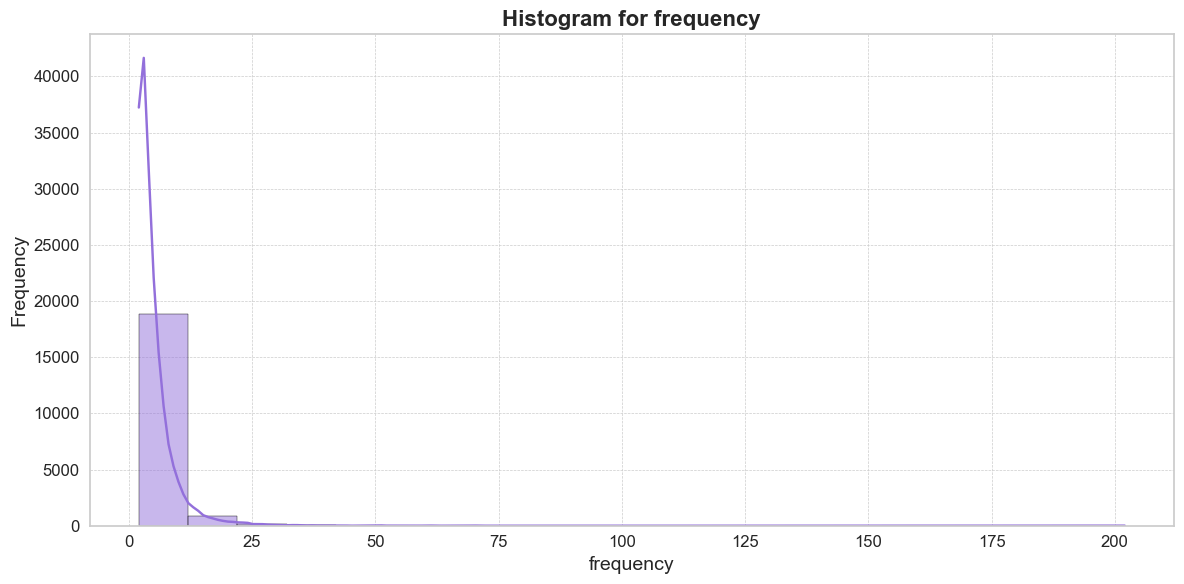

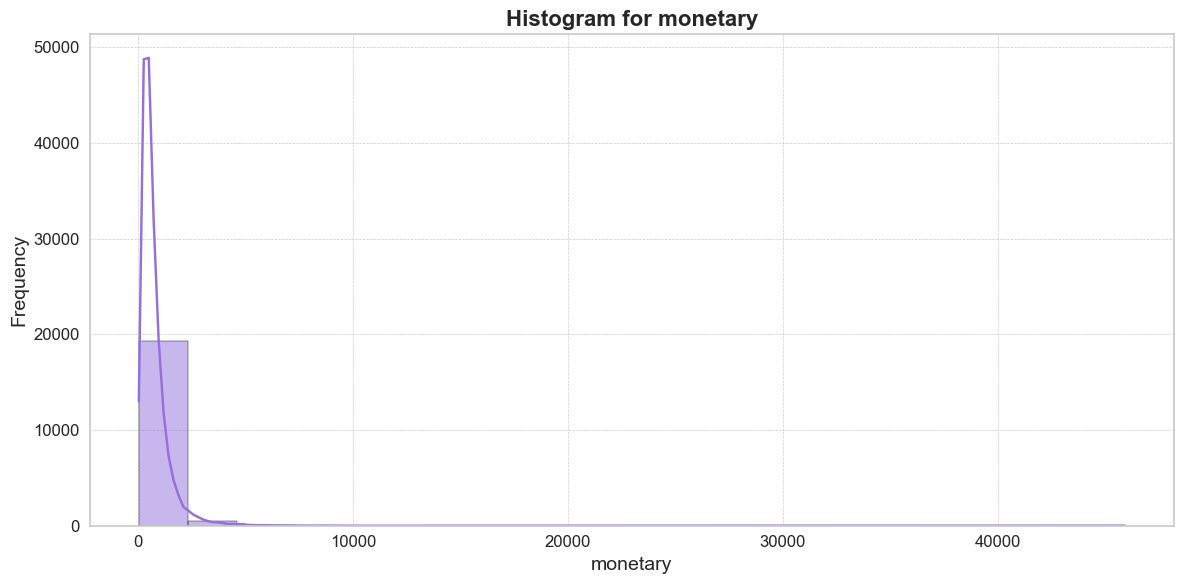

In [24]:
#Summary of Numericals columns
def num_summary(dataframe, col, groupby=None, log_scale=False, ax=None):
    """
    Plot histogram(s) for a column in a dataframe, optionally grouped by another column.

    Parameters:
    ----------
    dataframe : DataFrame
        The dataframe containing the data to plot.
    col : str
        Name of the column for which to plot the histogram.
    groupby : str or None, optional
        Name of the column by which to group the data. Default is None.
    log_scale : bool, optional
        Whether to use a logarithmic scale on the y-axis. Default is False.
    ax : matplotlib Axes object, optional
        Axes object to plot on. If None, a new figure and axes will be created. Default is None.

    Returns:
    -------
    None
    """
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col].describe(quantiles).T)

    
    # Set up the figure and axes if not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    
    # Set seaborn color palette for colorblind accessibility and distinct colors
    sns.set_palette(sns.color_palette("viridis"))
    
    # Plot histogram with or without grouping
    if groupby is not None:
        sns.histplot(data=dataframe, x=col, bins=20, kde=True, hue=groupby, palette="viridis", ax=ax)
    else:
        sns.histplot(data=dataframe, x=col, bins=20, kde=True, color='mediumpurple', ax=ax)
    
    # Set plot labels and title
    ax.set_title(f'Histogram for {col}', fontsize=16, weight='bold')
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    
    # Set y-axis to log scale if log_scale is True
    if log_scale:
        ax.set_yscale('log')
    
    # Enhance grid and ticks for better readability
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', labelsize=12)

    # Adjust layout for better spacing
    plt.tight_layout()



for col in num_cols:
    num_summary(final_df, col)

In [25]:
def target_summary_with_num(dataframe, target, numerical_col):
    
    # Group the dataframe by the target variable and calculate the mean of the numerical column for each group.
    # The .agg() method is used to apply the mean function to the specified numerical column.
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

# Iterate over each numerical column in the list of numerical columns.
for col in num_cols:
    # Call the target_summary_with_num function for each numerical column to print the mean values grouped by the target.
    target_summary_with_num(final_df, "segment", col)

         order_num_total_ever_online
segment                             
0                           1.499512
1                           6.577208
2                          12.640118
3                           3.845290
4                           1.221682
5                           2.373934
6                           1.319941
7                           1.712644


         order_num_total_ever_offline
segment                              
0                            1.373168
1                            1.973789
2                            2.150442
3                            1.330006
4                            1.080378
5                            4.512796
6                            2.090990
7                            1.874202


         customer_value_total_ever_offline
segment                                   
0                               171.660361
1                               258.010952
2                               273.086423
3                              

#### 3.2) Customer Segmentation with Hierarchical Clustering

In [26]:
model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure,frequency,monetary
0,0.198755,0.000000,0.344381,0.500774,0.720607,0.597095,0.164464,0.437012
1,0.499459,0.101181,0.362274,0.604762,0.741210,0.909584,0.472745,0.547330
2,0.150352,0.101181,0.385347,0.413806,0.859241,0.736516,0.164464,0.368608
3,0.000000,0.000000,0.177596,0.220302,0.793028,0.309917,0.000000,0.142443
4,0.000000,0.000000,0.207069,0.302315,0.700139,0.794240,0.000000,0.220609


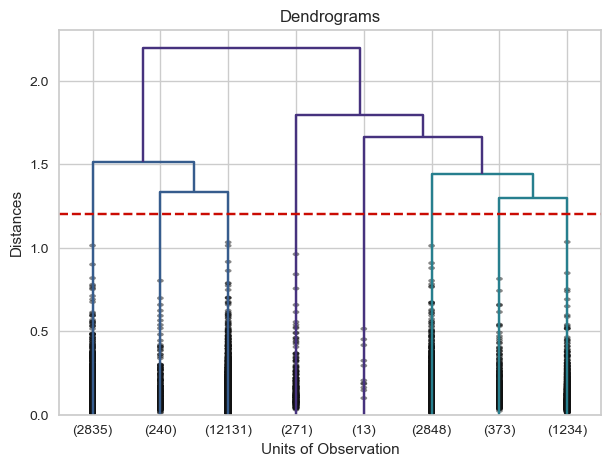

In [27]:
hc_complete = linkage(model_df, 'complete')

plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
plt.xlabel("Units of Observation")
plt.ylabel("Distances")
dend = dendrogram(hc_complete,
           truncate_mode="lastp",
           p=8,
           show_contracted=True,
           leaf_font_size=10)
plt.axhline(y=1.2, color='r', linestyle='--')
plt.show(block=True)


In [28]:
hc = AgglomerativeClustering(n_clusters=5,linkage="complete")

segments = hc.fit_predict(model_df)

In [29]:
# Creating final_df

final_df =df[["master_id","order_num_total_ever_online","order_num_total_ever_offline","customer_value_total_ever_offline","customer_value_total_ever_online","recency","tenure","frequency","monetary"]]

final_df["segment"] = segments

final_df.head()

,master_id,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure,frequency,monetary,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,4.0,1.0,139.99,799.38,95,119,5.0,939.37,0
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,19.0,2.0,159.97,1853.58,105,1469,21.0,2013.55,2
2,69b69676-1a40-11ea-941b-000d3a38a36f,3.0,2.0,189.97,395.35,186,366,5.0,585.32,1
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.0,1.0,39.99,81.98,135,11,2.0,121.97,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,1.0,1.0,49.99,159.99,86,582,2.0,209.98,1


In [30]:
## 0 dana baslayan clusterlari nosunu degistirelim

final_df["segment"] = final_df["segment"] + 1

In [31]:
final_df.head()

,master_id,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure,frequency,monetary,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,4.0,1.0,139.99,799.38,95,119,5.0,939.37,1
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,19.0,2.0,159.97,1853.58,105,1469,21.0,2013.55,3
2,69b69676-1a40-11ea-941b-000d3a38a36f,3.0,2.0,189.97,395.35,186,366,5.0,585.32,2
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.0,1.0,39.99,81.98,135,11,2.0,121.97,2
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,1.0,1.0,49.99,159.99,86,582,2.0,209.98,2


In [32]:
final_df.groupby("segment").agg({"order_num_total_ever_online":["mean","min","max"],
                                  "order_num_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_online":["mean","min","max"],
                                  "recency":["mean","min","max"],
                                  "tenure":["mean","min","max","count"],"frequency":["mean","min","max","count"],"monetary":["mean","min","max","count"]})

order_num_total_ever_online             order_num_total_ever_offline  \
                               mean  min    max                         mean   
segment                                                                        
1                          5.502581  1.0   48.0                     2.976655   
2                          1.874303  1.0   11.0                     1.574327   
3                         21.937269  8.0  200.0                     2.487085   
4                          3.307692  1.0   13.0                    56.153846   
5                          2.947795  1.0   13.0                     1.422222   

                     customer_value_total_ever_offline                     \
          min    max                              mean      min       max   
segment                                                                     
1         1.0   24.0                        429.331107    12.99  18119.14   
2         1.0    8.0                        202.547748    10.00   1719.96   
3         1.0   16.0                        293.876494    12.99   1988.02   
4        30.0  109.0                       4732.794615  2658.48  10239.46   
5         1.0    5.0                        178.106198    12.99   1294.94   

        customer_value_total_ever_online  ... tenure         frequency        \
                                    mean  ...    max  count       mean   min   
segment                                   ...                                  
1                             884.475522  ...   3034   4455   8.479237   2.0   
2                             287.918167  ...   2921  12371   3.448630   2.0   
3                            3514.989336  ...   3016    271  24.424354  10.0   
4                             600.825385  ...   1300     13  59.461538  31.0   
5                             513.768667  ...   2928   2835   4.370018   2.0   

                          monetary                            
           max  count         mean      min       max  count  
segment                                                       
1         53.0   4455  1313.806629   230.46  31227.41   4455  
2         12.0  12371   490.465915    44.98   2774.76  12371  
3        202.0    271  3808.865830  1303.80  45905.10    271  
4        111.0     13  5333.620000  2758.47  10383.44     13  
5         14.0   2835   691.874864    65.91   4319.76   2835  

[5 rows x 27 columns]